In [37]:
import argparse
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist
import imutils
from imutils import contours
from imutils.perspective import four_point_transform

In [38]:
img = cv2.imread("sudoku1.jpg")
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

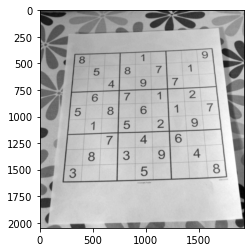

In [39]:
blurred_img = cv2.GaussianBlur(img_gray , (7,7) , 3)
plt.imshow(blurred_img , cmap="gray")

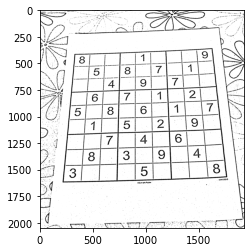

In [40]:
threshold = cv2.adaptiveThreshold(blurred_img , 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY , 11 , 2)
plt.imshow(threshold , cmap="gray")

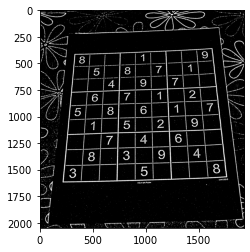

In [41]:
threshold = cv2.bitwise_not(threshold)
plt.imshow(threshold , cmap="gray")

In [47]:
contours = cv2.findContours(threshold , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]

In [48]:
contours = sorted(contours , key = cv2.contourArea , reverse = True)

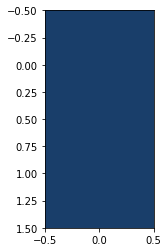

In [49]:
sudoku_contour = None

for contour in contours :
    
    epsilon = 0.02 * cv2.arcLength(contour , True)
    approx = cv2.approxPolyDP(contour , epsilon , True)
                              
    if len(approx) == 4:
        sudoku_contour = approx 
        x,y,w,h = cv2.boundingRect(sudoku_contour)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        for i in approx:
            cv2.circle(img,(i[0][0], i[0][1]),2,(0,0,255), 4)
        warped = four_point_transform(img, approx.reshape(4,2))
        plt.imshow(img[y:y+h,x:x+w], cmap = "gray")
        plt.imshow(warped, cmap = "gray")
        cv2.waitKey(0)
        
if sudoku_contour is None:
    print("couldn't find the sudoku table")